<a href="https://colab.research.google.com/github/jezzipan/curiando/blob/master/Copy_of_6_ARIMA_%26_SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

<img src="https://media.eadbox.com/system/uploads/saas/devise_logo/5e407cf9bf392e001feb33df/Logo%2010.PNG" width="100px" style="color:gray;" />

<h2>Trading com Dados </h2>

<hr>
<b>Curso</b> : Análise de Séries Temporais<br>
<b>Tópico</b> : ARIMA & SARIMA<br>
<b>Professor</b> : Robson Fernandes<br>
<hr>




<center>

### Instalando Dependências

In [1]:
!pip install statsmodels

Esta etapa é apenas para importar as bibliotecas, como numpy, pandas, matplotlib e statsmodels, que é a biblioteca que contém o modelo SARIMA e outros recursos estatísticos.

In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Configurações de Layout

Esta parte do código é usada para configurar os gráficos do matplotlib.

In [0]:
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'

### Importar DataSet

Conjunto de Dados vendas de veículos domésticos. Fonte : FRED Economic Research

Link: https://fred.stlouisfed.org/series/DAUTONSA

In [0]:
df = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=DAUTONSA&scale=left&cosd=1967-01-01&coed=2020-05-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2009-06-01&line_index=1&transformation=lin&vintage_date=2020-06-06&revision_date=2020-06-06&nd=1967-01-01")

In [5]:
df.head(2)

,DATE,DAUTONSA
0,1967-01-01,564.1
1,1967-02-01,509.1


O comando set_index está configurando a data da coluna como um Índice e o cabeçalho está imprimindo as 5 primeiras linhas do conjunto de dados.

In [6]:
df['DATE'] = pd.to_datetime(df['DATE'])

y = df.set_index(['DATE']) 
y.head(5)

,DAUTONSA
DATE,
1967-01-01,564.1
1967-02-01,509.1
1967-03-01,670.4
1967-04-01,710.2
1967-05-01,744.8


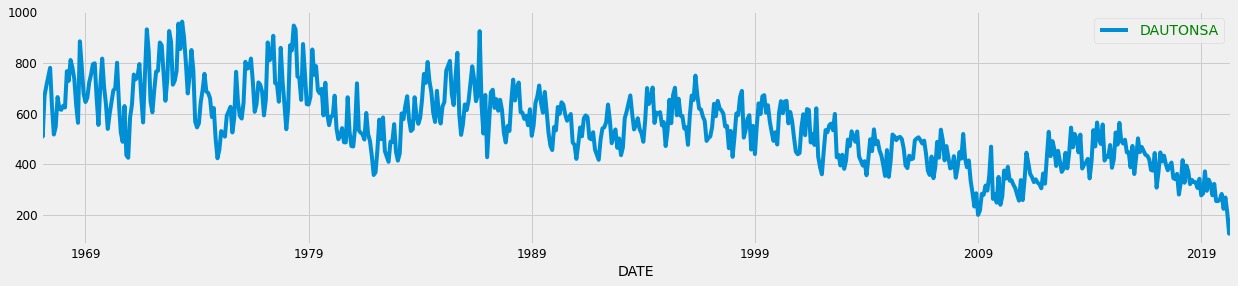

In [7]:
y.plot(figsize = (19, 4)) 
plt.show()

### Decomposição da Série Temporal - Modelo Aditivo

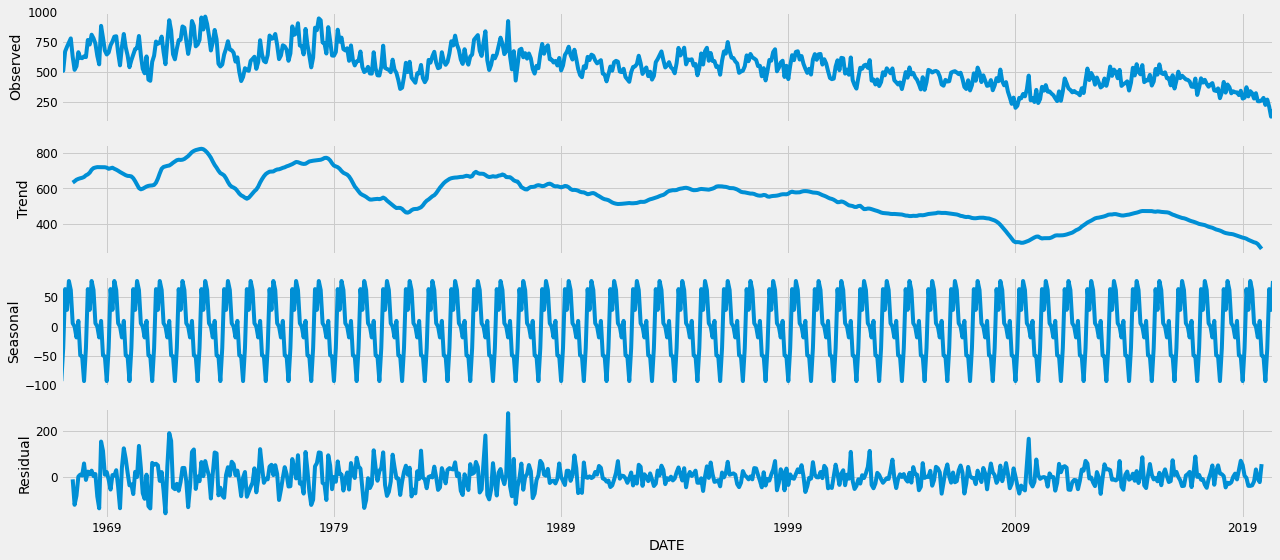

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

### Decomposição da Série Temporal - Modelo Multiplicativo

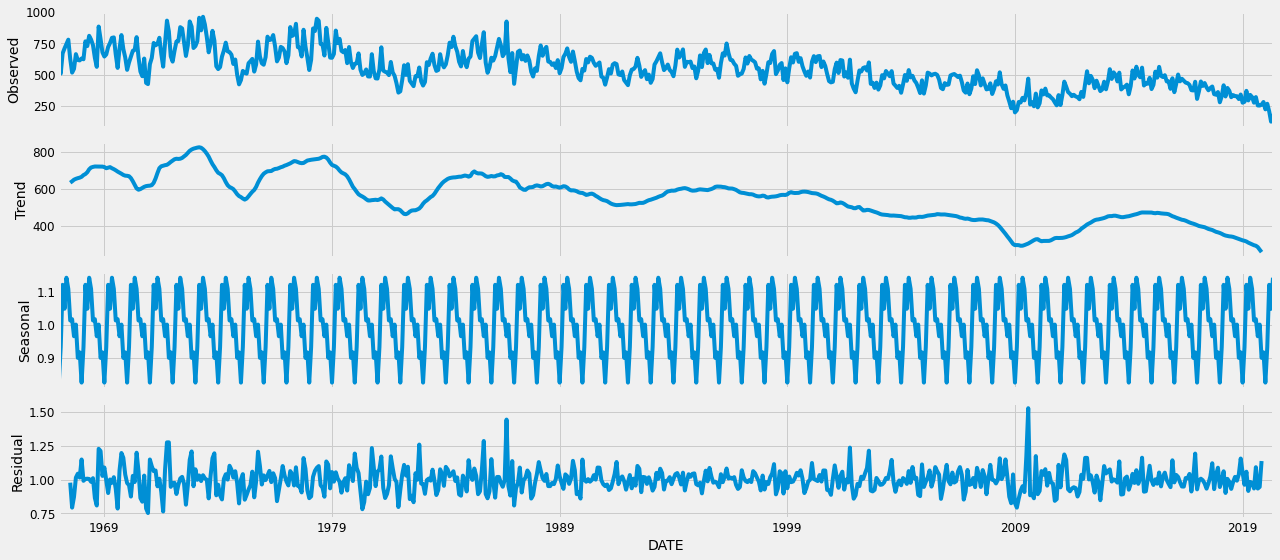

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
fig = decomposition.plot()
plt.show()

### SARIMA para previsão de Séries Temporais

Vamos usar o SARIMA. A notação de modelos é <b>SARIMA(p, d, q).(P,D,Q)m</b>. 

Esses três parâmetros são responsáveis ​​pela sazonalidade, tendência e ruído nos dados

In [10]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Exemplos de parâmetros para o SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Exemplos de parâmetros para o SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [11]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [12]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [13]:
evaluation_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            evaluation = 'ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic)
            print(evaluation)
            evaluation_list.append({"evaluation" : evaluation, "aic" : results.aic})
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:9930.841032195698
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:9015.714327729249
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:7377.909304815032
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:7224.803871728458
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:7378.5121378140175
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:7360.644649403934
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:7239.410050901193
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:7189.6765591287385
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:9148.163059928469
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:8358.260226402665
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:7121.4366392293105
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6933.8304723668925
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:7132.85762592779
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:7060.0015104759605
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6981.443364742414
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:6900.9801854379875
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:7404.160878486839
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:7088.598051851493
ARIMA

In [14]:
len(evaluation_list)

64

Segundo Peterson, T. (2014), o AIC (critério de informação de Akaike) é um estimador da qualidade relativa dos modelos estatísticos para um determinado conjunto de dados. 

Dada uma coleção de modelos para os dados, a AIC estima a qualidade de cada modelo, em relação a cada um dos outros modelos. Quanto menor o valor de AIC, melhor. 

Nossa saída sugere que SARIMAX(1, 1, 1)x(1, 1, 1, 12) com o valor de AIC 6570.58 sendo a melhor combinação, portanto devemos considerar que essa é a opção ideal.

In [15]:
aic = min(evaluation_list, key=lambda x:x['aic'])
aic

{'aic': 6630.105919533047,
 'evaluation': 'ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:6630.105919533047'}

In [16]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3080      0.054      5.672      0.000       0.202       0.414
ma.L1         -0.7446      0.043    -17.143      0.000      -0.830      -0.659
ar.S.L12       0.0844      0.030      2.781      0.005       0.025       0.144
ma.S.L12      -0.8203      0.027    -30.693      0.000      -0.873      -0.768
sigma2      2786.9852    107.544     25.915      0.000    2576.203    2997.767


Com o diagnóstico abaixo, podemos visualizar informações importantes como a distribuição e a função de correlação automática ACF (correlograma). Valores acima de "0" têm alguma correlação nos dados de séries temporais. Valores próximos a "1" demonstram a correlação mais forte.

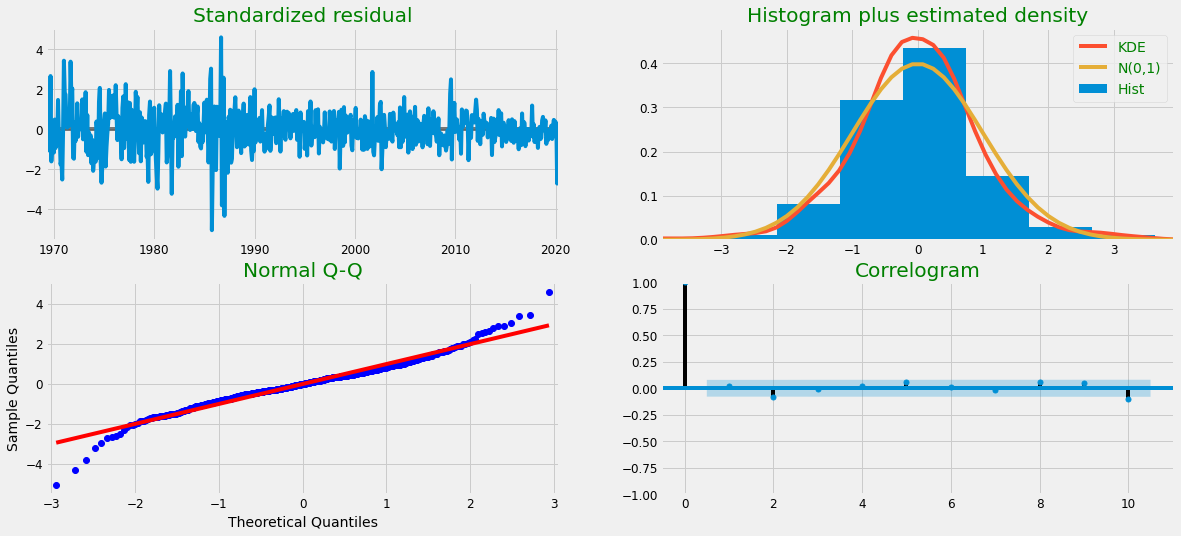

In [17]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

In [18]:
# Predição com intervalo de confiança de baixa e alta
pred = results.get_prediction(start=pd.to_datetime("2018-06-01"), dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head(5)

,lower DAUTONSA,upper DAUTONSA
2018-06-01,262.623800,469.564262
2018-07-01,243.988822,450.929284
2018-08-01,257.286571,464.227034
2018-09-01,202.931819,409.872281
2018-10-01,193.091371,400.031834


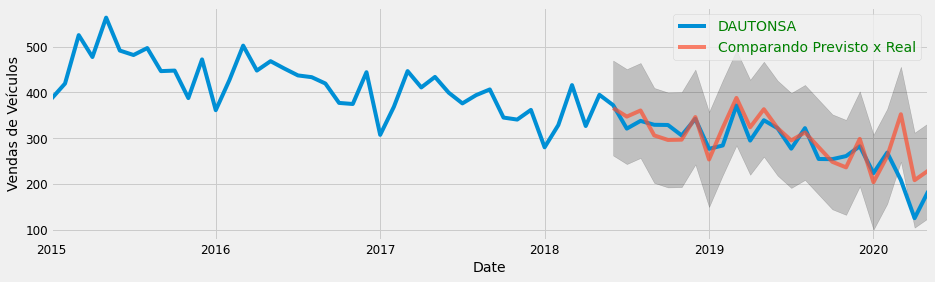

In [19]:
# Range do Gráfico com início em 2015
ax = y['2015':].plot(label='observed')
# Predição com base na confiança média
pred.predicted_mean.plot(ax=ax, label='Comparando Previsto x Real', alpha=.7, figsize=(14, 4))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Vendas de Veículos')
plt.legend()
plt.show()

### Avaliando Modelo

In [20]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-06-01':]
y_truth = y_truth["DAUTONSA"].values


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mse = ((y_forecasted - y_truth) ** 2).mean()
print('O erro médio quadrático é {}'.format(round(mse, 2)))
print('A raiz quadrada do erro médio é {}'.format(round(np.sqrt(mse), 2)))
print('O erro percentual absoluto médio é {}'.format(round(mean_absolute_percentage_error(y_truth, y_forecasted), 2)))

O erro médio quadrático é 1605.6
A raiz quadrada do erro médio é 40.07
O erro percentual absoluto médio é 12.01


### Valor Real versus Valor Previsto

In [21]:
pd.DataFrame.from_dict({"Data" : y['2018-06-01':].index, "Valor Real" : y_truth, "Valor Previsto" : y_forecasted.values, "diff" : y_truth - y_forecasted.values})

,Data,Valor Real,Valor Previsto,diff
0,2018-06-01,372.417,366.094031,6.322969
1,2018-07-01,321.267,347.459053,-26.192053
2,2018-08-01,338.095,360.756802,-22.661802
3,2018-09-01,329.564,306.402050,23.161950
4,2018-10-01,329.158,296.561603,32.596397
5,2018-11-01,306.410,297.160410,9.249590
6,2018-12-01,342.587,346.452280,-3.865280
7,2019-01-01,277.222,253.914172,23.307828
8,2019-02-01,284.480,323.064814,-38.584814
9,2019-03-01,371.850,388.100613,-16.250613


### Salvando Modelo Treinado

In [0]:
results.save("forecasting-model.pickle")

### Exercício 6 

Desenvolver um modelo predito SARIMAX na série das ações da Amazon, código <b>AMZN</b>

https://finance.yahoo.com/quote/AMZN%2CAPI/